In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/PW/Semestr 4/WB/Projekt/data/learning_data.csv")

In [3]:
df.head(10)

,ptnum,label,scc,C-103579009,C-125680007,C-186034007,C-263495000,C-398070004,C-424144002,C-72514-3,...,C-92140-3,C-92141-1,C-92142-9,C-94040-3,C-94531-1,C-979092,C-993452,C-997501,C-999998,C-999999
0,p17767.2,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p3832.1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p10784.2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p17630,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p17983,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,p25038.2,0,111,white,m,nonhispanic,m,massachusetts,50t70,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,p13304.2,1,76,white,m,nonhispanic,m,massachusetts,gt70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,p2473.1,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,p30785,0,105,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,p28157.2,0,106,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EARLY PREPROCESSING

In [4]:
df.shape

(9048, 785)

In [5]:
df.head(10)

,ptnum,label,scc,C-103579009,C-125680007,C-186034007,C-263495000,C-398070004,C-424144002,C-72514-3,...,C-92140-3,C-92141-1,C-92142-9,C-94040-3,C-94531-1,C-979092,C-993452,C-997501,C-999998,C-999999
0,p17767.2,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p3832.1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p10784.2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p17630,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p17983,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,p25038.2,0,111,white,m,nonhispanic,m,massachusetts,50t70,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,p13304.2,1,76,white,m,nonhispanic,m,massachusetts,gt70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,p2473.1,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,p30785,0,105,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,p28157.2,0,106,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Columns: 785 entries, ptnum to C-999999
dtypes: float64(59), int64(2), object(724)
memory usage: 54.2+ MB


In [7]:
df.isnull().sum()

ptnum             0
label             0
scc               0
C-103579009       0
C-125680007       0
               ... 
C-979092       9046
C-993452       9041
C-997501       9041
C-999998       9046
C-999999       9040
Length: 785, dtype: int64

In [8]:
df = df.applymap(lambda x: 1 if x == 'positive' or x is True or x == 'abnormal' else x)
df = df.applymap(lambda x: 0 if x == 'negative' or x is False or x == 'normal' else x)

In [9]:
df.head()

,ptnum,label,scc,C-103579009,C-125680007,C-186034007,C-263495000,C-398070004,C-424144002,C-72514-3,...,C-92140-3,C-92141-1,C-92142-9,C-94040-3,C-94531-1,C-979092,C-993452,C-997501,C-999998,C-999999
0,p17767.2,0,101,white,m,nonhispanic,m,massachusetts,50t70,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p3832.1,0,110,white,m,nonhispanic,m,massachusetts,50t70,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p10784.2,0,127,black,m,nonhispanic,m,massachusetts,50t70,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p17630,0,129,white,m,nonhispanic,m,massachusetts,50t70,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p17983,1,69,white,m,nonhispanic,m,massachusetts,50t70,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_nulls = df.isnull().sum()
df_nulls[df_nulls/df.shape[1] > .7 ].shape[0]

748

In [11]:
#lista kolumn gdzie nulle to ponad 70%
few_nulls = list(df_nulls[df.isnull().sum()/df.shape[1] < .7 ].index)
few_nulls

['ptnum',
 'label',
 'scc',
 'C-103579009',
 'C-125680007',
 'C-186034007',
 'C-263495000',
 'C-398070004',
 'C-424144002',
 'C-72514-3',
 'C-140',
 'C-18262-6',
 'C-2085-9',
 'C-2093-3',
 'C-2571-8',
 'C-39156-5',
 'C-710824005',
 'C-72166-2',
 'C-8462-4',
 'C-8480-6',
 'C-8867-4',
 'C-9279-1',
 'C-73595000',
 'C-171207006',
 'C-454711000124102',
 'C-718-7',
 'C-21000-5',
 'C-32623-1',
 'C-6690-2',
 'C-777-3',
 'C-785-6',
 'C-786-4',
 'C-787-2',
 'C-789-8',
 'C-4544-3',
 'C-430193006',
 'C-710841007']

In [12]:
df_corr = df.corr()['label'].abs()
df_corr.isna().sum()

689

In [13]:
df_corr

label        1.000000
scc          0.767924
C-72514-3    0.007824
C-140             NaN
C-18262-6    0.086138
               ...   
C-979092          NaN
C-993452          NaN
C-997501          NaN
C-999998          NaN
C-999999          NaN
Name: label, Length: 761, dtype: float64

In [14]:
#lista kolumn gdzie korelacja jest > .2
df_corr = df.corr()['label'].abs()
high_corr = list(df_corr[df_corr > .2].index)
high_corr

['label',
 'scc',
 'C-785-6',
 'C-789-8',
 'C-4544-3',
 'C-20565-8',
 'C-2069-3',
 'C-1920-8',
 'C-46288-7',
 'C-14959-1',
 'C-2713-6']

In [15]:
columns = list(set(few_nulls + high_corr))
columns

['C-103579009',
 'C-8867-4',
 'C-21000-5',
 'C-786-4',
 'C-46288-7',
 'C-424144002',
 'scc',
 'C-2085-9',
 'C-4544-3',
 'C-32623-1',
 'C-2713-6',
 'C-171207006',
 'C-430193006',
 'C-2069-3',
 'C-73595000',
 'C-9279-1',
 'C-72514-3',
 'C-398070004',
 'C-710841007',
 'C-710824005',
 'C-39156-5',
 'C-2571-8',
 'C-72166-2',
 'C-2093-3',
 'C-454711000124102',
 'C-785-6',
 'C-20565-8',
 'C-789-8',
 'ptnum',
 'C-186034007',
 'C-1920-8',
 'C-8480-6',
 'label',
 'C-787-2',
 'C-263495000',
 'C-6690-2',
 'C-718-7',
 'C-18262-6',
 'C-140',
 'C-125680007',
 'C-777-3',
 'C-8462-4',
 'C-14959-1']

In [16]:
df_drop = df[columns]
df_drop.head(5)

,C-103579009,C-8867-4,C-21000-5,C-786-4,C-46288-7,C-424144002,scc,C-2085-9,C-4544-3,C-32623-1,...,C-787-2,C-263495000,C-6690-2,C-718-7,C-18262-6,C-140,C-125680007,C-777-3,C-8462-4,C-14959-1
0,white,0.0,0.0,0.0,NaN,50t70,101,1.0,0.0,0.0,...,0.0,m,0.0,0.0,0.0,1.0,m,0.0,1.0,NaN
1,white,0.0,0.0,0.0,NaN,50t70,110,1.0,0.0,0.0,...,0.0,m,0.0,0.0,0.0,1.0,m,0.0,0.0,NaN
2,black,0.0,0.0,0.0,NaN,50t70,127,1.0,0.0,0.0,...,0.0,m,0.0,0.0,1.0,1.0,m,0.0,0.0,NaN
3,white,0.0,0.0,0.0,NaN,50t70,129,0.0,0.0,0.0,...,0.0,m,0.0,0.0,1.0,1.0,m,0.0,0.0,0.0
4,white,0.0,0.0,0.0,NaN,50t70,69,0.0,0.0,0.0,...,0.0,m,0.0,0.0,0.0,1.0,m,0.0,0.0,NaN


In [17]:
df_codes = pd.read_csv('C:/PW/Semestr 4/WB/Projekt/data/synthea-lc-dataset-codes.csv')
code_to_name = df_codes.set_index('code')['name'].to_dict()
code_to_name
df_drop = df_drop.rename(columns=code_to_name)
df_drop.head(5)

,race,Heart rate,Erythrocyte distribution width [Entitic volume] by Automated count,MCHC [Mass/volume] by Automated count,US Guidance for biopsy of Prostate,age,scc,High Density Lipoprotein Cholesterol,Hematocrit [Volume Fraction] of Blood by Automated count,Platelet mean volume [Entitic volume] in Blood by Automated count,...,MCV [Entitic volume] by Automated count,gender,Leukocytes [#/volume] in Blood by Automated count,Hemoglobin [Mass/volume] in Blood,Low Density Lipoprotein Cholesterol,Influenza seasonal injectable preservative free,marital,Platelets [#/volume] in Blood by Automated count,Diastolic Blood Pressure,Microalbumin Creatinine Ratio
0,white,0.0,0.0,0.0,NaN,50t70,101,1.0,0.0,0.0,...,0.0,m,0.0,0.0,0.0,1.0,m,0.0,1.0,NaN
1,white,0.0,0.0,0.0,NaN,50t70,110,1.0,0.0,0.0,...,0.0,m,0.0,0.0,0.0,1.0,m,0.0,0.0,NaN
2,black,0.0,0.0,0.0,NaN,50t70,127,1.0,0.0,0.0,...,0.0,m,0.0,0.0,1.0,1.0,m,0.0,0.0,NaN
3,white,0.0,0.0,0.0,NaN,50t70,129,0.0,0.0,0.0,...,0.0,m,0.0,0.0,1.0,1.0,m,0.0,0.0,0.0
4,white,0.0,0.0,0.0,NaN,50t70,69,0.0,0.0,0.0,...,0.0,m,0.0,0.0,0.0,1.0,m,0.0,0.0,NaN


In [18]:
df_drop.select_dtypes(include=['object']).columns

Index(['race', 'age', 'state', 'Tobacco smoking status NHIS', 'ptnum',
       'ethnic', 'gender', 'marital'],
      dtype='object')

In [19]:
df_drop['state'].unique()

array(['massachusetts'], dtype=object)

In [20]:
# tylko jedna wartość, więc wyrzucamy
df_drop.drop('state', axis=1, inplace=True)

In [21]:
df_drop['ethnic'].unique()

array(['nonhispanic', 'hispanic'], dtype=object)

In [22]:
df_drop['ethnic'] = df_drop['ethnic'].map({'nonhispanic': 0, 'hispanic': 1})

In [23]:
df_drop['gender'].unique()

array(['m', 'f'], dtype=object)

In [24]:
df_drop = pd.get_dummies(df_drop, prefix= 'gender', columns=['gender'])

In [25]:
df_drop['race'].unique()

array(['white', 'black', 'hawaiian', 'asian', 'native', 'other'],
      dtype=object)

In [26]:
df_drop = pd.get_dummies(df_drop, prefix= 'race', columns=['race'])

In [27]:
df_drop['marital'].unique()

array(['m', 's'], dtype=object)

In [28]:
df_drop['marital'] = df_drop['marital'].map({'s': 0, 'm': 1})

In [29]:
df_drop['age'].unique()

array(['50t70', 'gt70', '30t50'], dtype=object)

In [30]:
df_drop['age'] = df_drop['age'].map({'30t50': 1, '50t70': 2, 'gt70': 3})

In [31]:
df_drop.drop('ptnum', axis= 1, inplace=True)

In [32]:
df_drop["Tobacco smoking status NHIS"].unique()

array(['former', 'never', nan], dtype=object)

In [33]:
df_drop["Tobacco smoking status NHIS"] = df_drop["Tobacco smoking status NHIS"].map({'never': 0, 'former': 1})

In [34]:
df_drop.select_dtypes('object').columns

Index([], dtype='object')

# EDA

In [35]:
df_eda = df_drop
df_eda.shape

(9048, 47)

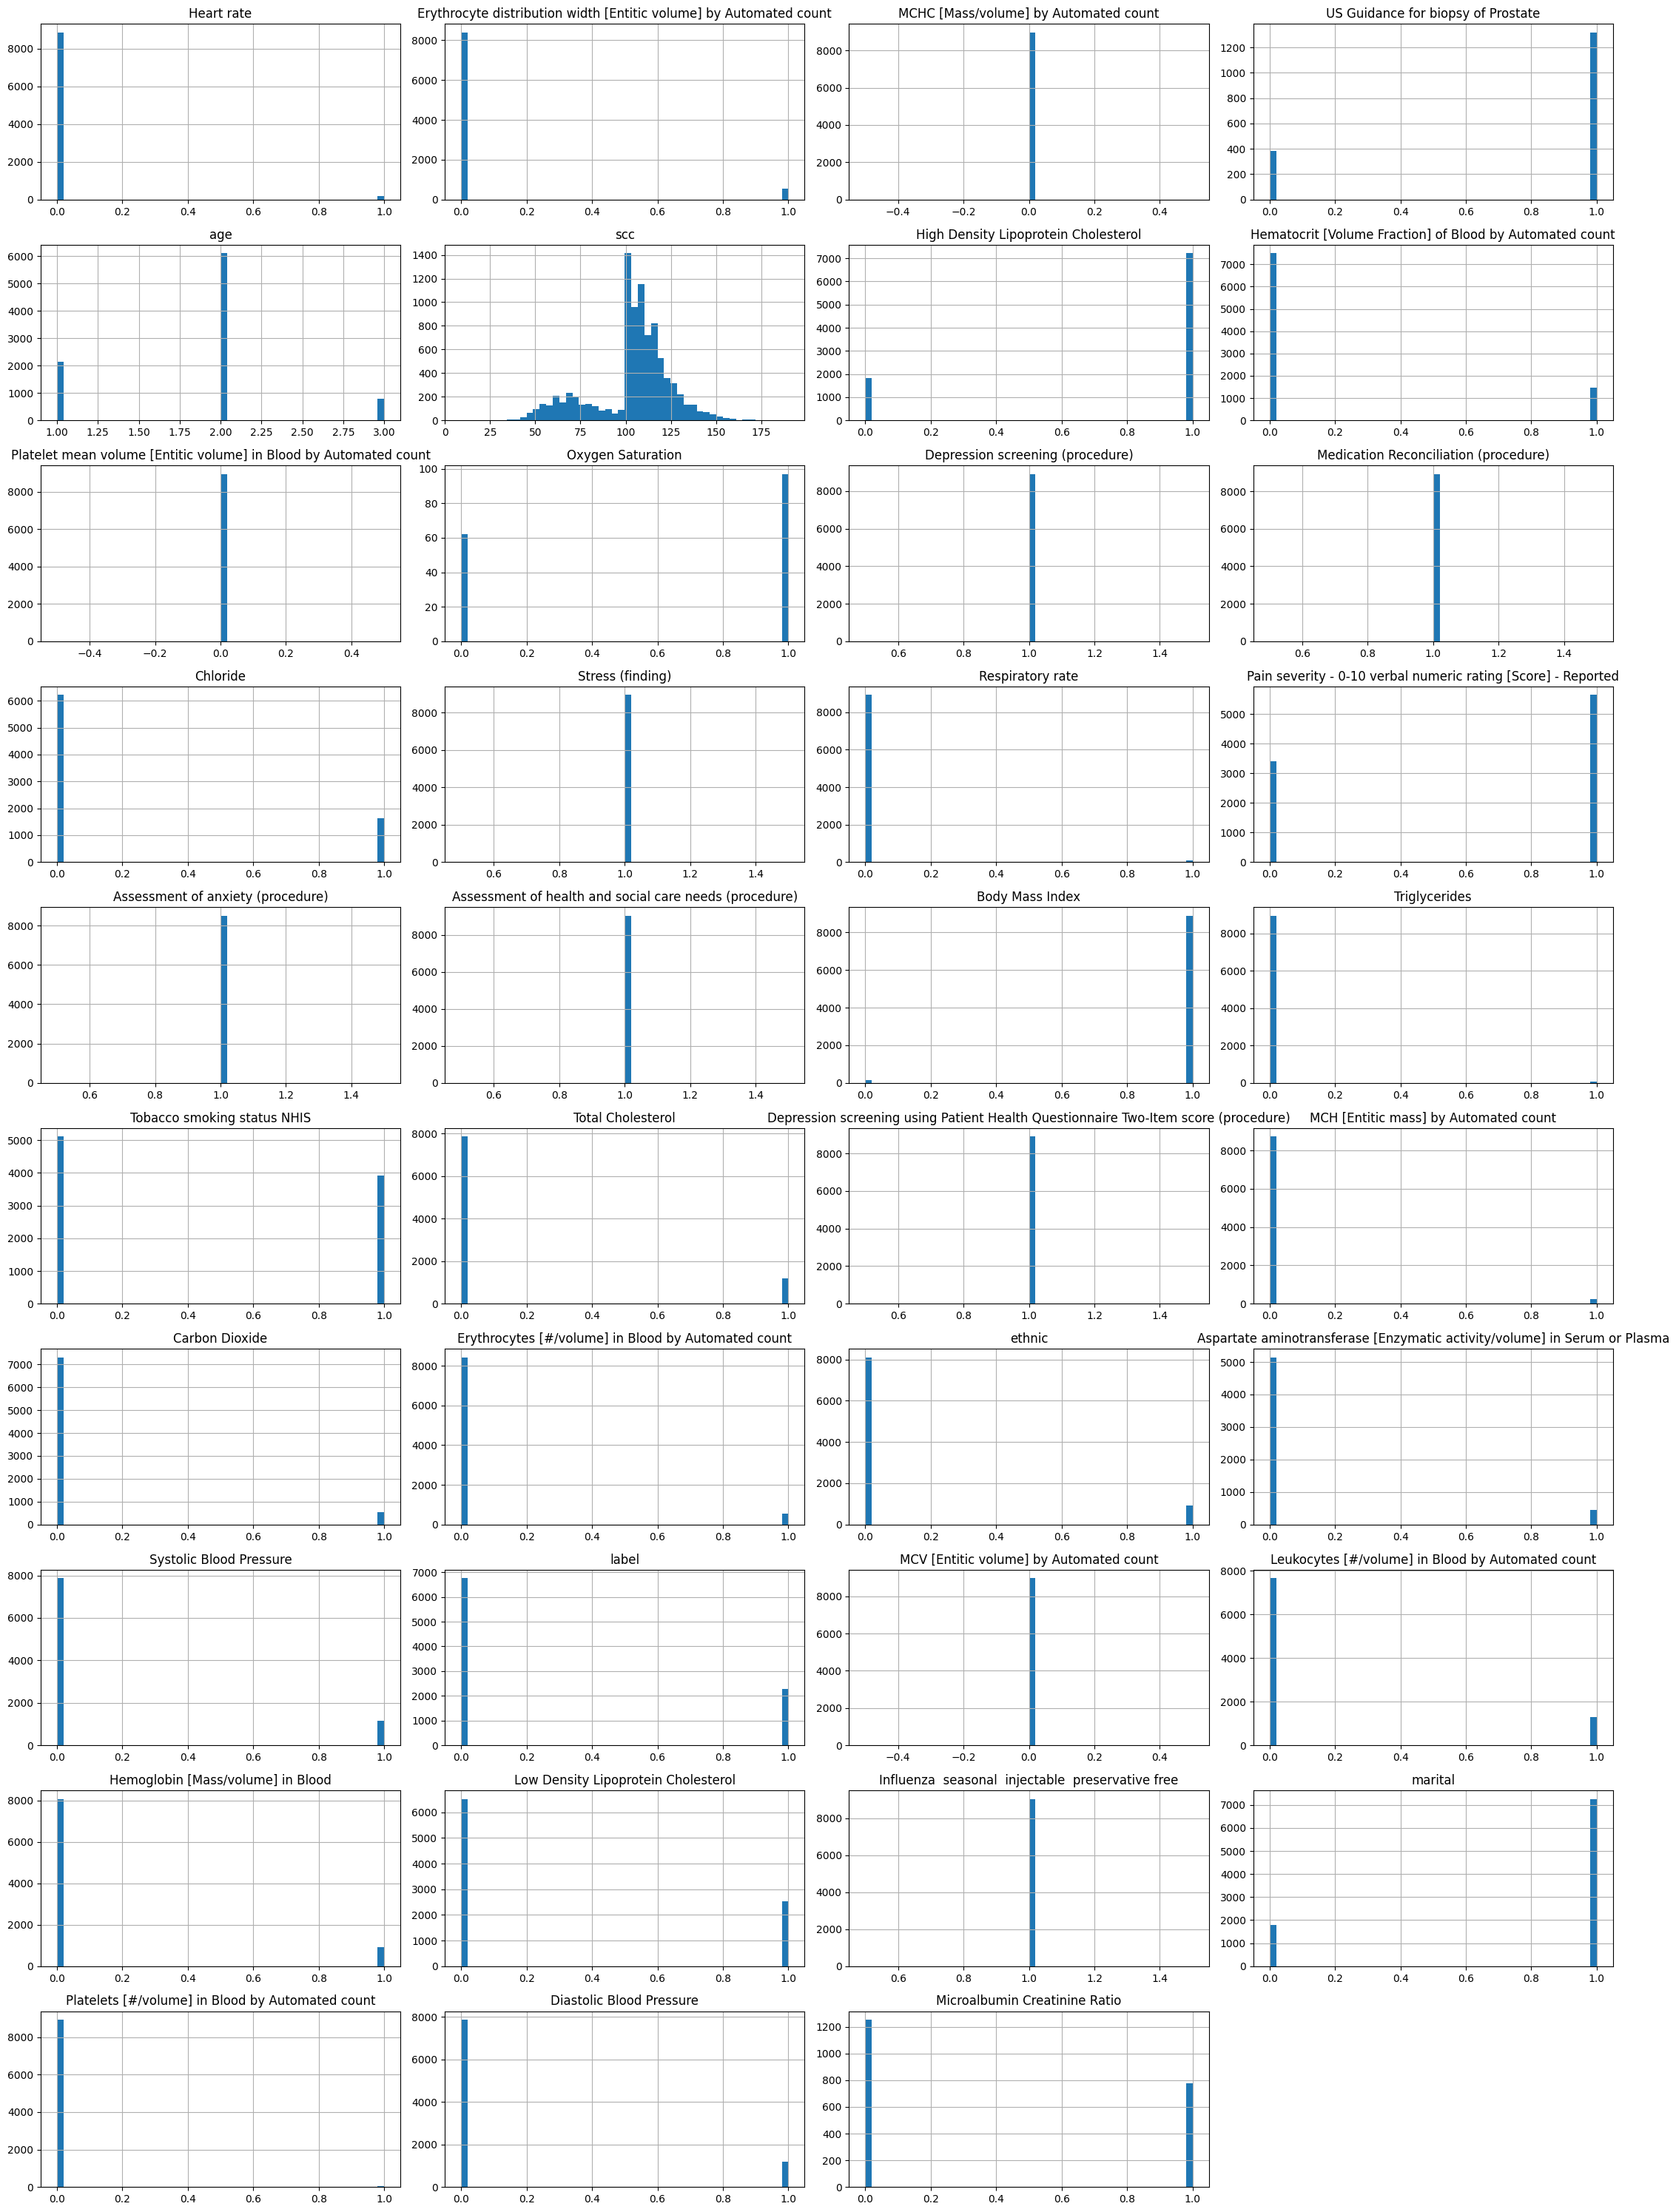

In [36]:
dummies = ['gender_f', 'gender_m', 'race_asian', 'race_black', 'race_white', 'race_hawaiian', 'race_native', 'race_other']
df_eda.drop(dummies, axis= 1).hist(bins=50, figsize=(22, 30), layout= (10,4))
plt.tight_layout()
plt.show()

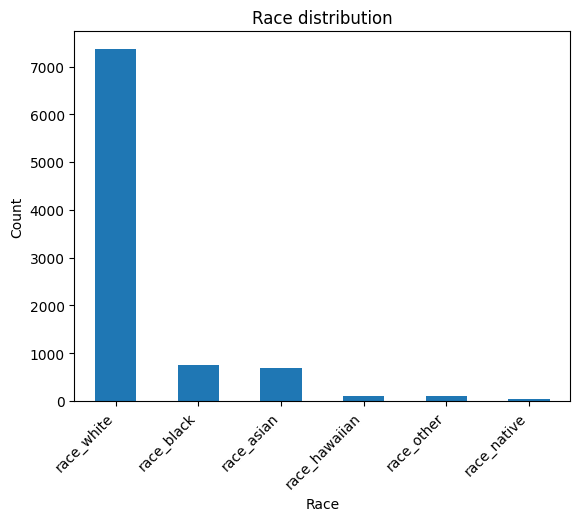

In [37]:
df_eda[['race_white', 'race_asian', 'race_black', 'race_hawaiian', 'race_native', 'race_other']].sum().sort_values(ascending=False).plot(kind='bar')

plt.title('Race distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

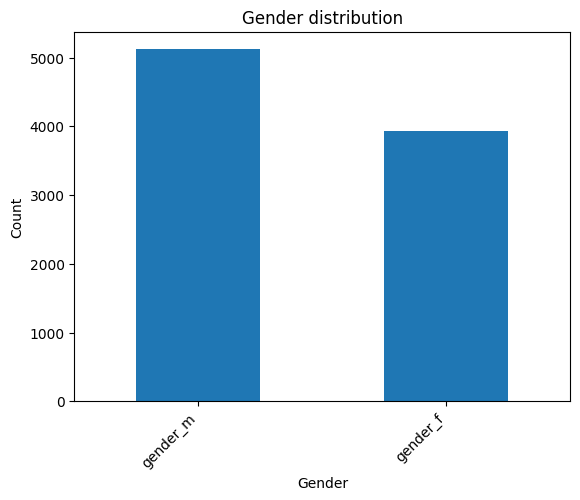

In [38]:
df_eda[['gender_f', 'gender_m']].sum().sort_values(ascending=False).plot(kind='bar')

plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

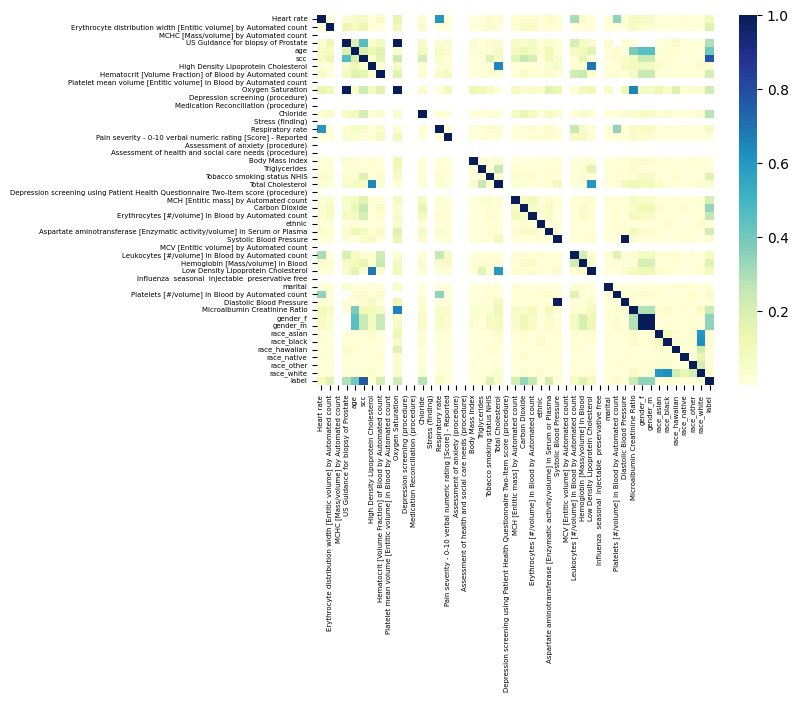

In [74]:
label = df_eda.pop('label')
df_eda['label'] = label

sns.heatmap(abs(df_eda.corr()), cmap="YlGnBu", xticklabels=True, yticklabels=True)

plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.show()